In [8]:
import pandas as pd
from sklearn.datasets import load_iris
# from IPython.display import display

"""
# 与逻辑回归LR的对比：GMM 在处理复杂的、非线性的数据集时表现良好，因为它具有更大的灵活性，能够适应各种不同形状的类别。
# 它假设不知道这个数据集有啥类别，而通过gmm就知道啥数据表现出的啥类别--无监督学习

GMM（高斯混合模型）的默认分类是以整数形式给出的，每个类别都有一个整数编号。这些编号通常从0开始递增，
对应于模型中每个组件的索引。例如，如果你的GMM模型有3个组件，那么它会给出0、1、2三个整数作为类别标签。
在使用gmm.predict(X)方法时，它会根据模型对数据进行分类，并返回每个样本所属的类别标签，这些标签就是整数形式的类别编号
"""
# 加载鸢尾花数据集
iris = load_iris()

# 将数据集转换为DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
# 增加标签列，如果target列存在则被新数据覆盖
df['target'] = iris.target
# 检测是否增加成功
# df.head()
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [12]:
# 显示DataFrame的前几行
display(df.head())

# 基于df数据进行模型训练
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 使用 PCA 将数据降维到二维，便于可视化
pca = PCA(n_components=2)
# X_pca = pca.fit_transform(df.iloc[:, :-1])  # 只选择特征列进行PCA降维
X_pca = pca.fit_transform(df.drop('target', axis=1))  # 选择特征列进行PCA降维
X_pca

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

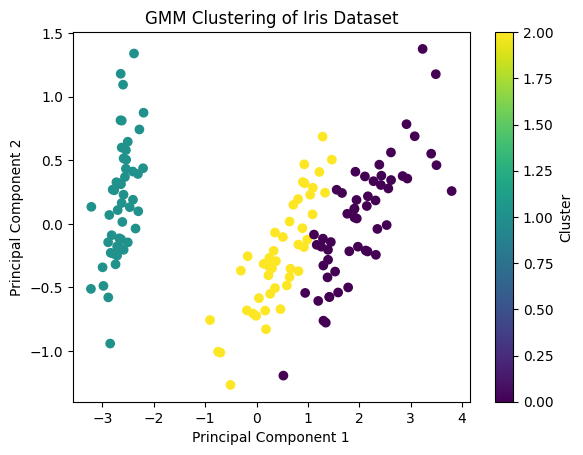

In [16]:
# 创建并拟合高斯混合模型
gmm = GaussianMixture(n_components=3, random_state=42)
# gmm.fit(df.iloc[:, :-1])  # 只选择特征列进行GMM拟合
gmm.fit(df.drop('target', axis=1))  # 选择特征列进行GMM拟合

# 获取每个样本的聚类标签
labels = gmm.predict(df.iloc[:, :-1])  # 只选择特征列进行预测

# 绘制聚类结果
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('GMM Clustering of Iris Dataset')
plt.colorbar(label='Cluster')
plt.show()

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]


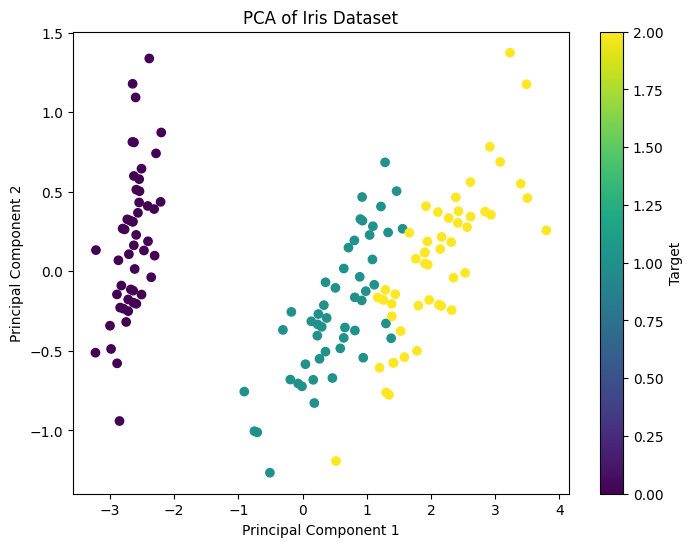

In [1]:
# PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pandas as pd

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 将数据集转换为DataFrame
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['target'] = y

# 打印数据集的前五行
print(df.head())

# 使用 PCA 将数据降维到二维，便于可视化
pca = PCA(n_components=2)  # n_components=2 表示降维到二维
X_pca = pca.fit_transform(X)  # 对数据进行主成分分析，并返回转换后的数据集

# 打印降维后的数据
print(X_pca[:5])

# 可视化降维后的数据
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar(label='Target')
plt.show()


In [4]:
# PCA产生的矩阵验证
import numpy as np
from sklearn.decomposition import PCA

# 创建随机数据矩阵
np.random.seed(0)  # 设置随机种子以保证结果的可重复性
data = np.random.rand(18, 12)  # 创建一个 18 行 12 列的随机数据矩阵

# 使用 PCA 进行降维到二维
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data)

# 显示降维后的数据
print("降维前的数据矩阵：")
print(data)
print("\n降维后的数据矩阵：")
# PCA（主成分分析）产生的特征向量是正交的。在PCA中，通过找到数据中方差最大的方向（即主成分），将数据投影到新的坐标轴上，
# 这些主成分是彼此正交的。这意味着它们是线性无关的，并且组成了新的特征空间的基
print(data_pca)


降维前的数据矩阵：
[[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
  0.43758721 0.891773   0.96366276 0.38344152 0.79172504 0.52889492]
 [0.56804456 0.92559664 0.07103606 0.0871293  0.0202184  0.83261985
  0.77815675 0.87001215 0.97861834 0.79915856 0.46147936 0.78052918]
 [0.11827443 0.63992102 0.14335329 0.94466892 0.52184832 0.41466194
  0.26455561 0.77423369 0.45615033 0.56843395 0.0187898  0.6176355 ]
 [0.61209572 0.616934   0.94374808 0.6818203  0.3595079  0.43703195
  0.6976312  0.06022547 0.66676672 0.67063787 0.21038256 0.1289263 ]
 [0.31542835 0.36371077 0.57019677 0.43860151 0.98837384 0.10204481
  0.20887676 0.16130952 0.65310833 0.2532916  0.46631077 0.24442559]
 [0.15896958 0.11037514 0.65632959 0.13818295 0.19658236 0.36872517
  0.82099323 0.09710128 0.83794491 0.09609841 0.97645947 0.4686512 ]
 [0.97676109 0.60484552 0.73926358 0.03918779 0.28280696 0.12019656
  0.2961402  0.11872772 0.31798318 0.41426299 0.0641475  0.69247212]
 [0.56660145 0.26538949 0.52324

In [5]:
import numpy as np

# 创建数据矩阵
data = np.random.rand(18, 12)

# 计算数据矩阵的协方差矩阵
# 对于协方差矩阵，数据矩阵不需要是方阵，因为协方差矩阵是由数据的特征之间的协方差计算而来的，而不是直接由数据本身决定的。

# 协方差矩阵的维度取决于数据矩阵的特征数，而不是样本数。因此，即使数据矩阵的行数和列数不相等，也可以计算出对应的协方差矩阵。
# 在特征值分解时，可以对这样的非方阵协方差矩阵进行操作，得到特征值和特征向量。

# 因此，即使数据矩阵不是方阵，也可以计算协方差矩阵的特征值和特征向量

cov_matrix = np.cov(data, rowvar=False)

# 对协方差矩阵进行特征值分解
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# 输出特征值和特征向量
print("特征值：", eigenvalues)
print("特征向量：", eigenvectors)


特征值： [0.21657541 0.19107643 0.1679531  0.12359818 0.10070307 0.00382042
 0.00675261 0.01294333 0.07845489 0.03740592 0.05382002 0.0535138 ]
特征向量： [[ 0.43589855  0.01441522  0.17960457 -0.23497078 -0.12831403 -0.17530927
  -0.41282826 -0.2577435   0.53346934 -0.30177795  0.22200252 -0.11538753]
 [ 0.26270496  0.02322371  0.55662971  0.1365461  -0.15375253  0.13437293
   0.37082255 -0.17229676  0.19787545  0.20769866 -0.5515714  -0.08092835]
 [ 0.09057181  0.21760583  0.11897339  0.15755196  0.37697719 -0.03617343
  -0.46924491  0.12966972 -0.31853582 -0.12666696 -0.34132703 -0.53947019]
 [-0.33425384  0.03931714  0.08407746 -0.08592261  0.47856263 -0.5078098
   0.22808829  0.12341241  0.35635102 -0.31188776 -0.25155194  0.17490153]
 [ 0.03972834 -0.04525317  0.33950685  0.0505557  -0.14129072 -0.45382036
   0.32259186 -0.25558794 -0.51327778 -0.27237761  0.33719888 -0.17860466]
 [-0.25840252 -0.09545382  0.15586722  0.37869789  0.0782031   0.30610017
   0.2146035   0.21449851  0.3710310